# A quicker Approach to Pair Graphs

In April 2021  notebooks I developed an explicit adjacency matrix mostly populated with $-1$ values, then the graph was created including all those negative values. The $\eta_L(e)$ adding becomes simple but very expensive using this explicit notation because there is $O(|\Sigma|^2)$ computations for every adding.

To overcome this explosion we can take just positive values in a pair graph, and change both the add operation and the calculus of $\eta$

## Python Preamble

In [1]:
import sys
sys.path.append("../../src")
%reload_ext autoreload
%autoreload 2

from theory202105 import *
from helpers import graph
import theory202104

In [2]:
import logging, logging.config, sys

# Disable other loggers
logging.config.dictConfig({
    'version': 1,
    'disable_existing_loggers': True,
})

# Set logging for this notebook only
logging.basicConfig(
    format='[%(asctime)s] %(levelname)s: %(message)s',
    level=logging.INFO,
    handlers=[
        logging.StreamHandler(stream=sys.stderr),
    ]
)

## Positive Graph

Pair cardinality is defined equal than in 202104. 

In [3]:
pandasPair( pairs_in_trace("abXYabXaYbN")  ).T

,"(a, a)","(a, b)","(b, a)","(b, b)","(Y, Y)","(Y, X)","(X, Y)","(X, X)","(N, N)"
pairs,-1,3,-1,-1,-1,-1,2,-1,-1


In 202104 theory, the graph is dense.

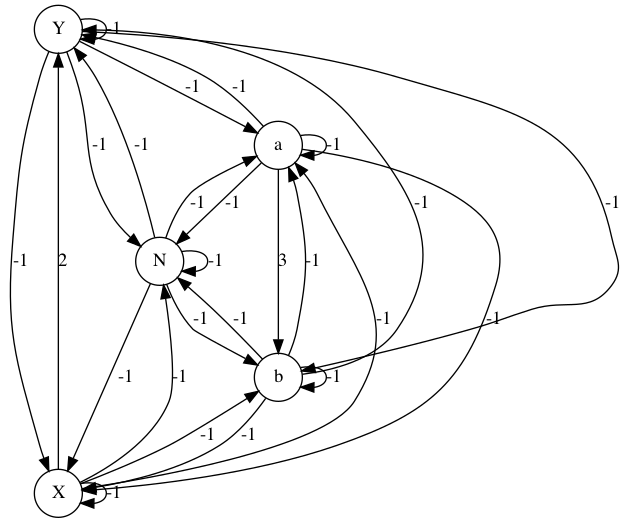

In [4]:
G_T = theory202104.pair_graph("abXYabXaYbN")
graph(G_T)

But the *positive pair graph* is made only of non negative layers and includes all symbols. Note that in the example both the original and the non negative graphs are displayed.

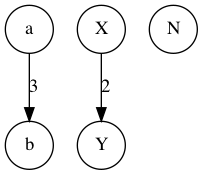

In [5]:
positive_G_T = positive_graph("abXYabXaYbN")
graph(positive_G_T)

Extract a sequence from the non negative graph is the same than as it was explained in 2021-04-22.

In [6]:
sequences_from_positive_graph( positive_graph("abXYabXaYbN") )

{3: [['a', 'b']], 2: [['X', 'Y']]}

## 2021-04 version, ground  truth
When adding a  counter example $ba$ to the previous graph, then only $XY$ remains as a sequence. The correct results obtained in 2021-04 is shown below.

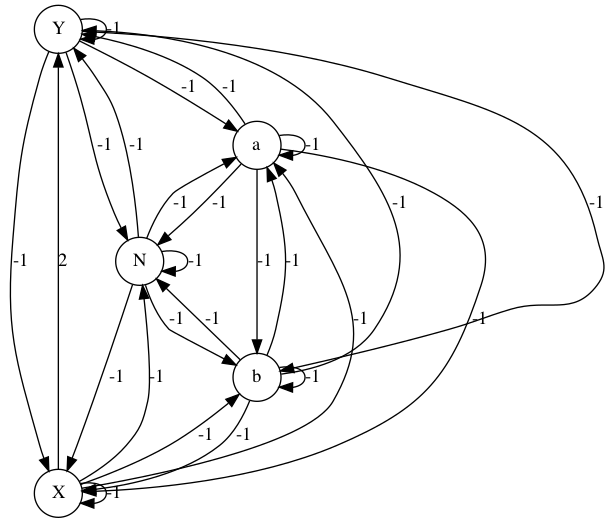

{2: [['X', 'Y']]}

In [7]:
T1 = 'abXYabXaYbN'; T2 = 'ba'
addedGraphs = theory202104.pair_graph(T1) + theory202104.pair_graph(T2) 

graph( addedGraphs )

theory202104.sequences_from_pair_graph( addedGraphs )

And for the case that X appears only in the second graph, then XY is destroyed as pair.

In [8]:
T1 = 'abXYabXaYbN'; T2 = 'baX'
addedGraphs = theory202104.pair_graph(T1) + theory202104.pair_graph(T2) 
theory202104.sequences_from_pair_graph( addedGraphs )

{}

## New add operation

The intuition of improved adding is to recall the forbidden by manually labelling with -1, and assume that any edge not explicitly shown is also -1. This new adding operation is closed for pair graphs and the clique method can be used.

Add positive graphs is defined by transferring the weights of the disjoint edges. Note that both $ab$ and $ba$ appears here after the adding with -1. The add operation is conmutative.

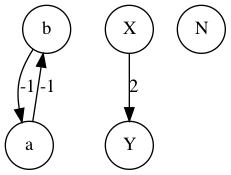

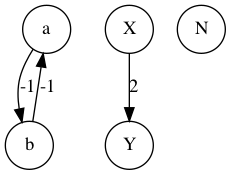

{2: [['X', 'Y']]}

In [9]:
T1 = 'ba'; T2 = 'abXYabXaYbN'
addedGraphs1 = positive_graph(T1) + positive_graph(T2) 
addedGraphs2 = positive_graph(T2) + positive_graph(T1) 
graph( addedGraphs1 )
graph( addedGraphs2 )
sequences_from_positive_graph( addedGraphs1 )

In the case of the pair $XY$ in one graph but just one symbol in the other graph, a counter example is also included to carry on the information that $XY$ is not a pair in the combined graph.

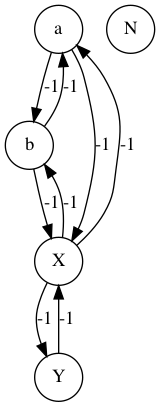

{}

In [10]:
T1 = 'abXYabXaYbN'; T2 = 'baX'
addedGraphs3 = positive_graph(T1) + positive_graph(T2) 

graph( addedGraphs3 )
sequences_from_positive_graph( addedGraphs3 )

## Checking

### Special bifurcation

For trace aXYbaYXb the positive pair graph is:


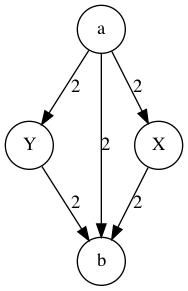

Sequences inferred from 202104 theory: {2: [['a', 'Y', 'b'], ['a', 'X', 'b']]}
Sequences inferred from 202105 theory: {2: [['a', 'Y', 'b'], ['a', 'X', 'b']]}


In [11]:
L=['aXYbaYXb']
for X in L:
    print('For trace {} the positive pair graph is:'.format(X))
    graph(positive_graph(X))

print('Sequences inferred from 202104 theory: {}'.format(theory202104.sequences_from_log(L))) 
print('Sequences inferred from 202105 theory: {}'.format(sequences_from_log(L))) 

For trace 
['A', 's', 'B', 'C', '1', '2', '3', 'q', '4', '1', '2', '3', '4', 'A', 'w', 'B', 'd', 'C', 'A', 'B', 'C', 'x', 'y', '1', '2', '3', '4', 'f', '1', '2', '3', '4', 'A', 's', 'B', 'z', 'C', 'A', 'B', 'd', 'C', '1', '2', '3', '4', '1', '2', 's', '3', '4', 'A', 'B', 'C', 'A', 'f', 'B', 'C', '1', '2', '3', 'd', '4', '1', '2', '3', '4', 'A', 'B', 'C'] 
the positive pair graph is:


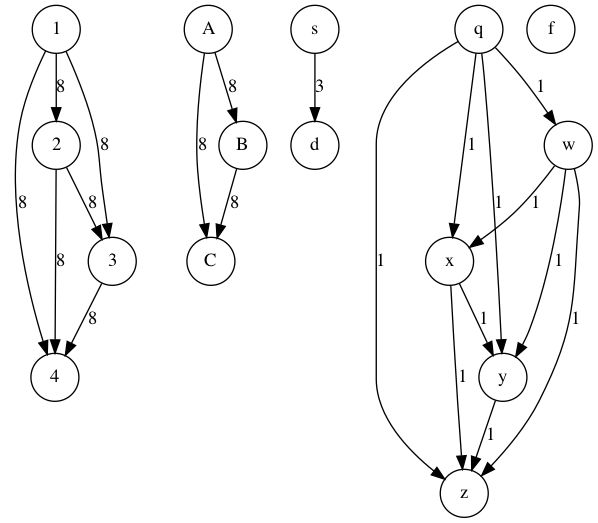

For trace 
['q', 'w', '1', 'x', 'A', 'B', 'C', '2', '3', 'y', 'z', '4', '1', 'q', 'w', 'x', 'y', 'z', '2', 'A', '3', 'B', '4', 'C', 'A', 'q', '1', 'B', '2', '3', 'w', '4', 'C', 'x', '1', '2', 'A', 'y', '3', 'B', '4', 'C', 'z', 'A', 's', 'B', 'f', 'C', '1', 'q', '2', 'f', '3', '4', '1', '2', '3', 'd', '4', 'A', 'w', 'B', 'd', 'C', 'A', 'B', 'C', '1', '2', '3', '4', 'f', '1', '2', '3', '4', 'A', 'B', 'C', 'A', 'B', 'x', 'y', 'z', 'd', 'C', '1', '2', '3', '4', '1', '2', 's', '3', '4', 'A', 'B', 'C', 'A', 'B', 'C', '1', '2', '3', 'd', '4', '1', '2', 'f', '3', '4', 'A', 'B', 'f', 'C'] 
the positive pair graph is:


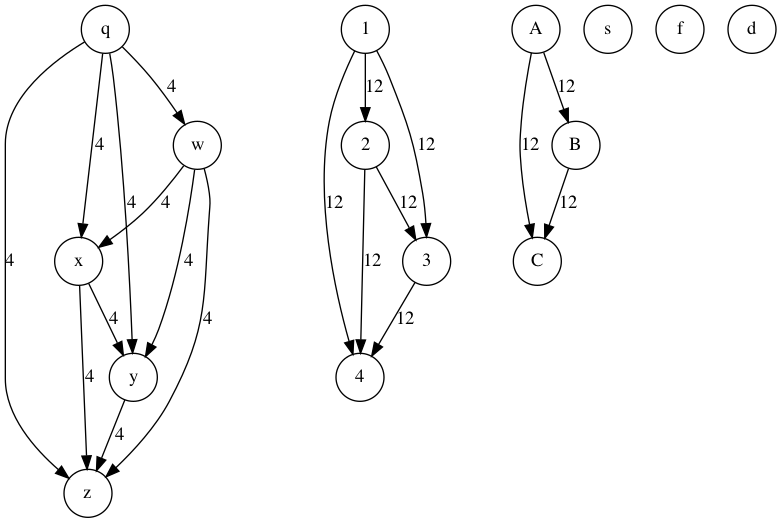

All graphs summed up are:


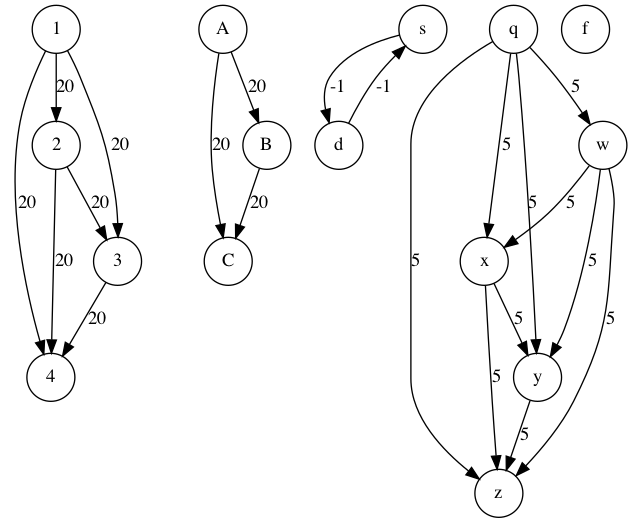

Sequences inferred from 202104 theory: 
{20: [['A', 'B', 'C'], ['1', '2', '3', '4']], 5: [['q', 'w', 'x', 'y', 'z']]}
Sequences inferred from 202105 theory: 
{20: [['A', 'B', 'C'], ['1', '2', '3', '4']], 5: [['q', 'w', 'x', 'y', 'z']]}


In [12]:
# Single path ABC 1234 qwxyz noise(sfd)
L = [
    list("AsBC123q41234AwBdCABCxy1234f1234AsBzCABdC123412s34ABCAfBC123d41234ABC"),
#     list(""),
    list("qw1xABC23yz41qwxyz2A3B4CAq1B23w4Cx12Ay3B4CzAsBfC1q2f34123d4AwBdCABC1234f1234ABCABxyzdC123412s34ABCABC123d412f34ABfC"),
#     list(""),
#     list("")
]

for X in L:
    print('For trace \n{} \nthe positive pair graph is:'.format(X))
    graph(positive_graph(X))
    
print('All graphs summed up are:')
graph(sum_of_graphs_list(L))

print('Sequences inferred from 202104 theory: \n{}'.format(theory202104.sequences_from_log(L))) 
print('Sequences inferred from 202105 theory: \n{}'.format(sequences_from_log(L))) 

# Some benchmarking

In [13]:
import random

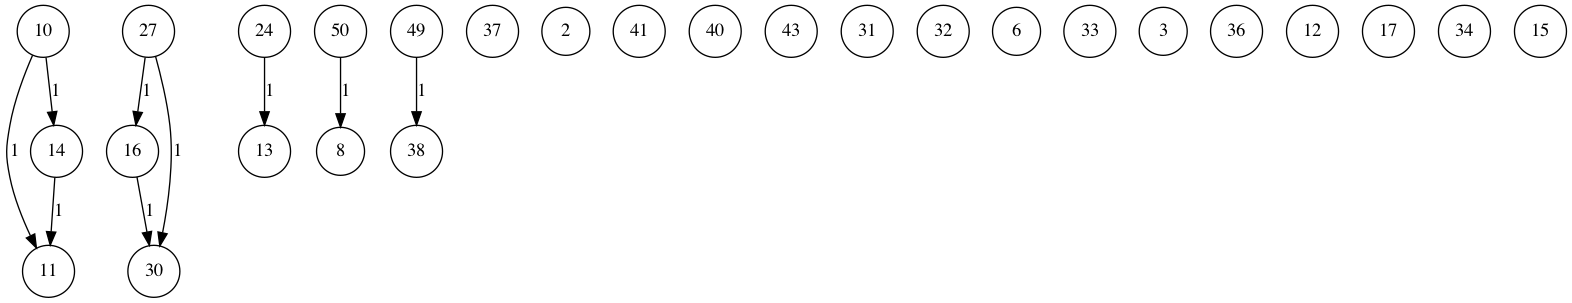

CPU times: user 31 ms, sys: 3.54 ms, total: 34.6 ms
Wall time: 537 ms


In [14]:
%%time
N=10; Sigma= 50; Log=5
L=[]
for i in range(0,Log):
    L.append([random.randint(1, Sigma) for n in range(N)])

G=sum_of_graphs_list(L)
graph(G.positive())

In [19]:
%%time
N=100; Sigma= 1000; Log=40
L=[]
for i in range(0,Log):
    L.append([random.randint(1, Sigma) for n in range(N)])

S=sequences_from_log(L)
S

CPU times: user 47.9 s, sys: 1.23 s, total: 49.1 s
Wall time: 49.2 s


{1: [[257, 640, 77],
  [241, 259],
  [522, 401, 413],
  [11, 716],
  [575, 349, 525],
  [829, 823, 270],
  [527, 85],
  [474, 17],
  [19, 165, 983],
  [222, 337, 795],
  [662, 283],
  [861, 286],
  [854, 545],
  [195, 698, 83, 803, 368],
  [295, 760, 169],
  [229, 927, 569],
  [827, 488],
  [572, 759],
  [62, 952],
  [651, 830],
  [492, 332],
  [922, 364, 696],
  [193, 625],
  [751, 899],
  [297, 755, 137, 923, 392],
  [440, 956],
  [972, 710]],
 3: [[594, 552], [551, 388]],
 2: [[693, 832],
  [894, 615],
  [840, 622],
  [787, 558],
  [210, 815],
  [479, 532],
  [252, 217]]}

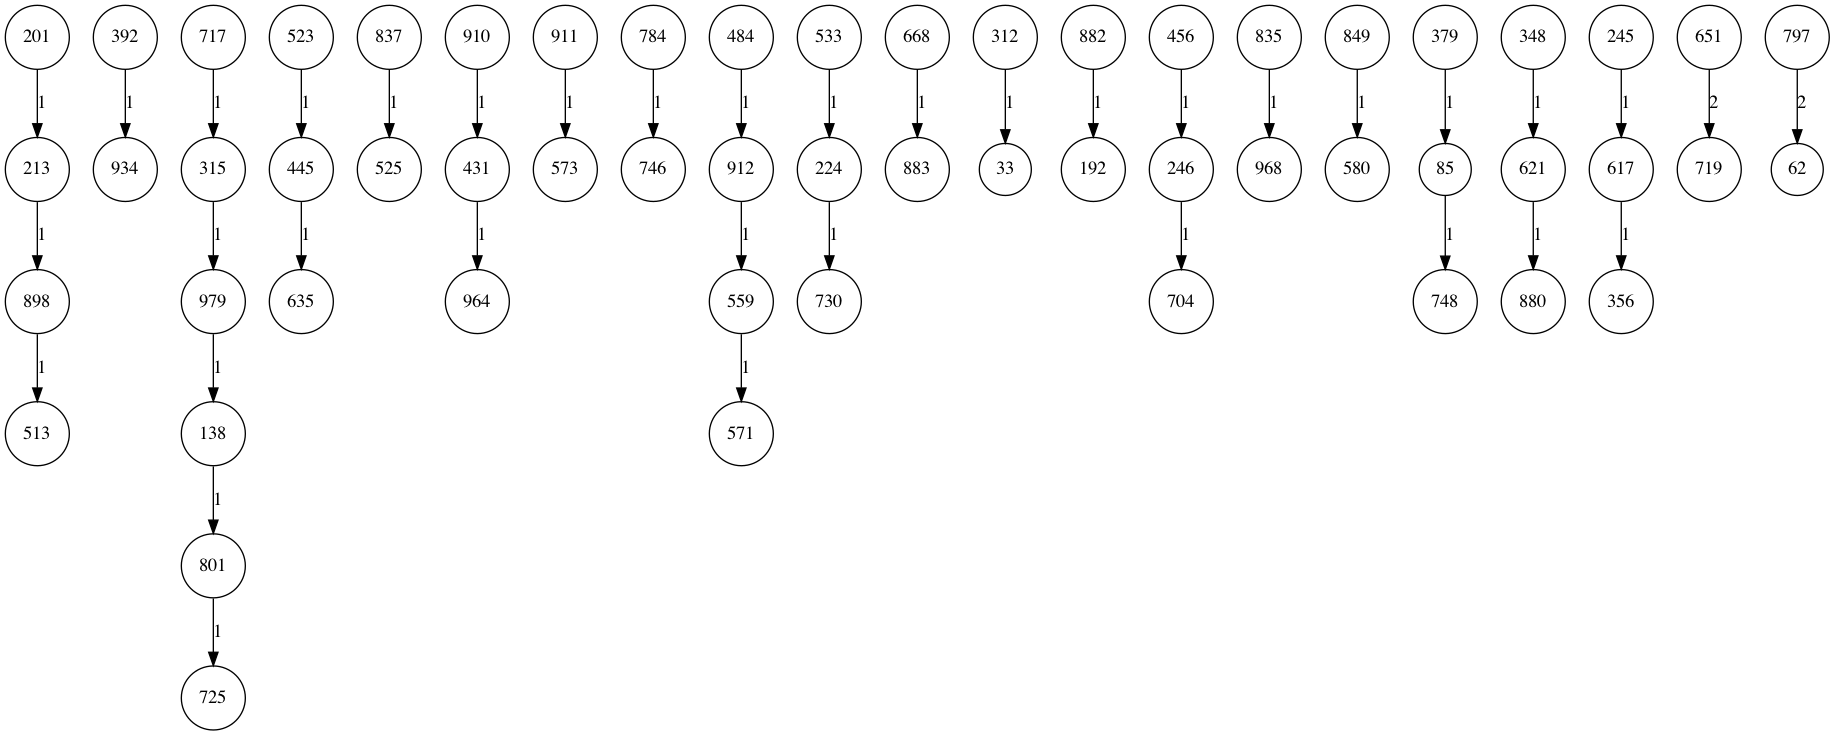

In [16]:
def graph_sequences(S):
    G=pairDiGraph()
    for weight in S:
        for seq in S[weight]:
            for a,b in zip(seq[:-1], seq[1:]):
                G.add_edge(a, b, weight=weight)
    graph(G)
graph_sequences(S)

## Control Structures

This example should be analyzed in a new notebook. Basic idea: current sequence detection $S=s_1s_2...s_N$ of a trace $T$ is **strongly defined** because it implies that if $s_i$ appears in $T$ $\implies$ $s_j$ appears in $T$. A weaker notion is that if both $s_i, s_j$ appears in $T$ $\implies$ $s_i, s_j$ are pair in $T$. This weaker pairing allows to infer control structures like if / then, however it could introduce artifacts.

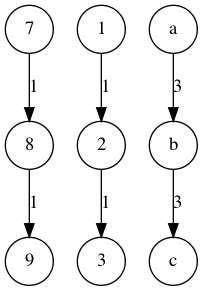

In [17]:
L=[
    list('abc123'),
    list('abc789'),
    list('abc')
]
graph_sequences( sequences_from_log(L) )

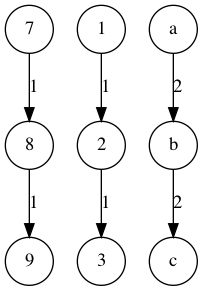

In [18]:
L=[
    list('123abc'),
    list('789abc')
]
graph_sequences( sequences_from_log(L) )